In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('file.csv')

In [3]:
df.head(10)

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
5,Australia,25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
6,Austria,26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
7,Azerbaijan,5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
8,Bahamas,15,5,2,5,12,0,0,0,0,0,15,5,2,5,12
9,Bahrain,8,0,0,1,1,0,0,0,0,0,8,0,0,1,1


In the dataframe, rename the column Total to Total_Medals

Display first 10 records using "head()" function to take a look at the dataframe. 

In [4]:
df.rename(columns={'Total':'Total_Medals'},inplace=True)
df.head()

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


Some Countries love Summer, some Winter. We think it has to do something with their Olympic performance.

For this task, we will try to figure out which olympic event does a country perform better in.

In [5]:
df.isnull().sum()

Country_Name     0
# Summer         0
Gold_Summer      0
Silver_Summer    0
Bronze_Summer    0
Total_Summer     0
# Winter         0
Gold_Winter      0
Silver_Winter    0
Bronze_Winter    0
Total_Winter     0
# Games          0
Gold_Total       0
Silver_Total     0
Bronze_Total     0
Total_Medals     0
dtype: int64

In [6]:
# data = {'name': ['A', 'B', 'C', 'D', 'E'], 
#         'age': [12, 66, 22, 80, 7], 
#         'gender': ['M', 'F', 'F', 'M', 'M'],
#         }
# df1 = pd.DataFrame(data, columns = ['name', 'age', 'gender'])

# print("dataframe before: \n",df1)

# """
# Creating a new column called senior_citizen where the value is yes 
# if df.age is greater than 60 and no if not
# """
# df1['senior_citizen'] = np.where(df1['age']>=60, 'yes', 'no')
# print("dataframe after:\n",df1)

Create a new column Better_Event that stores 'Summer','Winter' or 'Both' based on the comparision between the total medals won in Summer event and Winter event (i.e. comparision between the Total_Summer and Total_Winter columns) using "np.where()"function.

In [7]:
df['Better_Event'] = np.where(df['Total_Summer'] > df['Total_Winter'], 'Summer', 'Winter')
df['Better_Event'] = np.where(df['Total_Summer'] == df['Total_Winter'],'Both',df['Better_Event'])

In [8]:
df.head(10)

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals,Better_Event
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,Summer
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,Summer
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,Summer
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,Summer
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,Summer
5,Australia,25,139,152,177,468,18,5,3,4,12,43,144,155,181,480,Summer
6,Austria,26,18,33,35,86,22,59,78,81,218,48,77,111,116,304,Winter
7,Azerbaijan,5,6,5,15,26,5,0,0,0,0,10,6,5,15,26,Summer
8,Bahamas,15,5,2,5,12,0,0,0,0,0,15,5,2,5,12,Summer
9,Bahrain,8,0,0,1,1,0,0,0,0,0,8,0,0,1,1,Summer


In [9]:
better=[]
for i in range(0,len(df)):
    if df['Total_Summer'][i] > df['Total_Winter'][i] :
        better.append('Summer')
    elif df['Total_Summer'][i] < df['Total_Winter'][i] :
        better.append('Winter')
    else:
        better.append('Both')

In [10]:
len(better)
len(df)

147

Find out which has been a better event with respect to all the performing countries by using value_counts() function and store it in a new variable called 'better_event'.

In [11]:
a=df['Better_Event'].value_counts()
a.values[0]

143

Which are the top 10 performing teams at summer event (with respect to total medals), winter event and overall?

In [12]:
top_countries=df[['Country_Name','Total_Summer', 'Total_Winter','Total_Medals']]

#Dropping the last row
top_countries=top_countries.drop(index=146) #drop row using index
top_countries.head(10)

,Country_Name,Total_Summer,Total_Winter,Total_Medals
0,Afghanistan,2,0,2
1,Algeria,15,0,15
2,Argentina,70,0,70
3,Armenia,12,0,12
4,Australasia,12,0,12
5,Australia,468,12,480
6,Austria,86,218,304
7,Azerbaijan,26,0,26
8,Bahamas,12,0,12
9,Bahrain,1,0,1


In [13]:
def top_ten(data,month_type,to_drop1,to_drop2):
    return data.sort_values(month_type,ascending=False).drop(columns=[to_drop1,to_drop2],axis=1).head(10).reset_index()

In [14]:
summer=top_ten(top_countries,'Total_Summer','Total_Winter','Total_Medals')
winter=top_ten(top_countries,'Total_Winter','Total_Summer','Total_Medals')
overall=top_ten(top_countries,'Total_Medals','Total_Winter','Total_Summer')
print(list(summer['Country_Name'].values))
print(list(winter['Country_Name'].values))
print(list(overall['Country_Name'].values))

['United States', 'Soviet Union', 'Great Britain', 'France', 'Germany', 'Italy', 'Sweden', 'Hungary', 'China', 'Australia']
['Norway', 'United States', 'Austria', 'Germany', 'Soviet Union', 'Canada', 'Finland', 'Sweden', 'Switzerland', 'Russia']
['United States', 'Soviet Union', 'Great Britain', 'Germany', 'France', 'Italy', 'Sweden', 'China', 'Russia', 'East Germany']


In [15]:
merged_top_ten=pd.concat([summer,winter,overall],axis=1)
merged_top_ten

,index,Country_Name,Total_Summer,index,Country_Name,Total_Winter,index,Country_Name,Total_Medals
0,135,United States,2399,93,Norway,329,135,United States,2681
1,106,Soviet Union,1010,135,United States,282,106,Soviet Union,1204
2,49,Great Britain,780,6,Austria,218,49,Great Britain,806
3,41,France,671,44,Germany,209,44,Germany,782
4,44,Germany,573,106,Soviet Union,194,41,France,780
5,64,Italy,549,21,Canada,170,64,Italy,663
6,120,Sweden,483,40,Finland,161,120,Sweden,627
7,56,Hungary,476,120,Sweden,144,23,China,526
8,23,China,473,121,Switzerland,138,104,Russia,519
9,5,Australia,468,104,Russia,124,46,East Germany,519


CHART

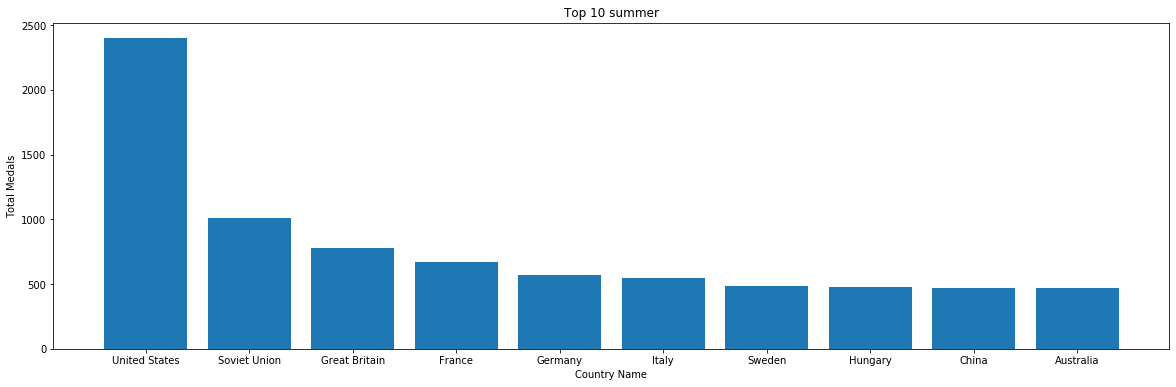

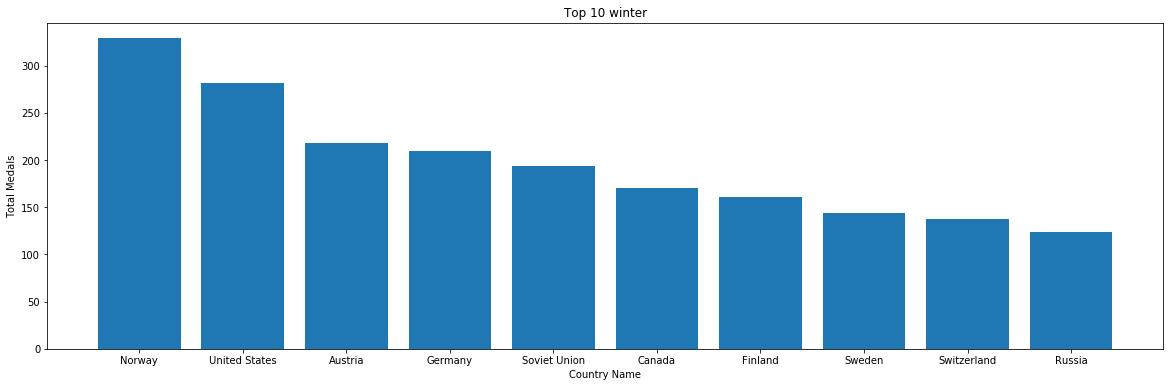

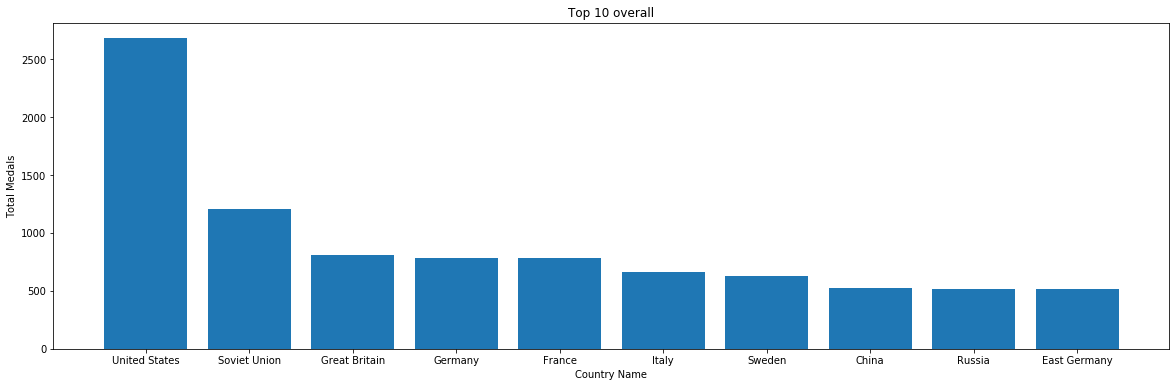

In [16]:
def charts(x_list,y_list,titl):
    plt.figure(figsize=(20, 6))
    plt.bar(x_list,y_list)
    plt.title(titl)
    plt.xlabel('Country Name')
    plt.ylabel('Total Medals')
    plt.show()

charts(list(summer['Country_Name']),list(merged_top_ten['Total_Summer']),"Top 10 summer")
charts(list(winter['Country_Name']),list(merged_top_ten['Total_Winter']),"Top 10 winter")
charts(list(overall['Country_Name']),list(merged_top_ten['Total_Medals']),"Top 10 overall")




    Drop the last row from the dataframe(The last row contains the total of all the values calculated vertically) and save the result in 'data_1'

    Update the dataframe 'data_1' to include a new column called Total_Points which is a weighted value where each gold medal counts for 3 points, silver medals for 2 points, and bronze medals for 1 point. (i.e. You need to take the weighted value of Gold_Total, Silver_Total and Bronze_Total)

    Find the max value of Total_Points in 'data_1' and the country associated with it and store it in variables 'most_points' and 'best_country' respectively.


In [17]:
df.tail(5)

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals,Better_Event
142,Independent Olympic Participants,1,0,1,2,3,0,0,0,0,0,1,0,1,2,3,Summer
143,Zambia,12,0,1,1,2,0,0,0,0,0,12,0,1,1,2,Summer
144,Zimbabwe,12,3,4,1,8,1,0,0,0,0,13,3,4,1,8,Summer
145,Mixed team,3,8,5,4,17,0,0,0,0,0,3,8,5,4,17,Summer
146,Totals,27,4809,4775,5130,14714,22,959,958,948,2865,49,5768,5733,6078,17579,Summer


In [18]:
data1=df.drop(index=146,inplace=True)

# EASY METHOD TO ADD A  COLUMN

In [19]:
Total_Points=list((df['Gold_Total']*3)+(df['Silver_Total']*2)+(df['Bronze_Total']*1))
Total_Points = pd.Series(Total_Points)
Total_Points.values.reshape(-1,1)
df['Total Points']=Total_Points      
df.tail(15)

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals,Better_Event,Total Points
131,Turkey,21,39,25,24,88,16,0,0,0,0,37,39,25,24,88,Summer,191
132,Uganda,14,2,3,2,7,0,0,0,0,0,14,2,3,2,7,Summer,14
133,Ukraine,5,33,27,55,115,6,2,1,4,7,11,35,28,59,122,Summer,220
134,United Arab Emirates,8,1,0,0,1,0,0,0,0,0,8,1,0,0,1,Summer,3
135,United States,26,976,757,666,2399,22,96,102,84,282,48,1072,859,750,2681,Summer,5684
136,Uruguay,20,2,2,6,10,1,0,0,0,0,21,2,2,6,10,Summer,16
137,Uzbekistan,5,5,5,10,20,6,1,0,0,1,11,6,5,10,21,Summer,38
138,Venezuela,17,2,2,8,12,4,0,0,0,0,21,2,2,8,12,Summer,18
139,Vietnam,14,0,2,0,2,0,0,0,0,0,14,0,2,0,2,Summer,4
140,Virgin Islands,11,0,1,0,1,7,0,0,0,0,18,0,1,0,1,Summer,2


Find the max value of Total_Points in 'data_1' and the country associated with it and store it in variables 'most_points' and 'best_country' respectively.

In [147]:
data1={'max_val':df['Total Points'].max(),'country':df['Country_Name'].loc[df['Total Points'].idxmax()]}
later=pd.DataFrame([data1])
later

,max_val,country
0,5684,United States




    In the dataframe 'summer_df'(created in the previous function) , create a new column Golden_Ratio which is the quotient after dividing the two columns Gold_Summer and Total_Summer.

    Find the max value of Golden_Ratio and the country associated with it and store them in summer_max_ratio and summer_country_gold respectively.

    In the dataframe 'winter_df'(created in the previous function) , create a new column Golden_Ratio which is the quotient after dividing the two columns Gold_Winter and Total_Winter.

    Find the max value of Golden_Ratio and the country associated with it and store them in 'winter_max_ratio' and 'winter_country_gold' respectively.

    In the dataframe top_df'(created in the previous function) , create a new column Golden_Ratio which is the quotient after dividing the two columns Gold_Total and Total_Medals.

    Find the max value of Golden_Ratio and the country associated with it and store them in top_max_ratio' and 'top_country_gold' respectively.


In [184]:
summer['Golden_Ratio']=summer['Total_Summer']/df['Gold_Summer']
summer.head(3)

,index,Country_Name,Total_Summer,Golden_Ratio
0,135,United States,2399,inf
1,106,Soviet Union,1010,202.000000
2,49,Great Britain,780,43.333333




    Create a single row dataframe called 'best' from 'data' where the value of column Country_Name is equal to 'best_country'(The variable you created in the previous task)

    Subset 'best' even further by only including the columns: ['Gold_Total','Silver_Total','Bronze_Total']

    Create a stacked bar plot of 'best' using "DataFrame.plot.bar()" function

    Name the x-axis as United States using "plt.xlabel()"

    Name the y-axis as Medals Tally using "plt.ylabel()"

    Rotate the labels of x-axis by 45o using "plt.xticks()"


In [185]:
best=later.drop(columns='max_val')
best.rename(columns={'country':'Country_name'},inplace=True)
best

,Country_name
0,United States


In [186]:
df['Bronze_Total']
m=df.loc[135]
gold_total=m['Gold_Total']
silver_total=m['Silver_Total']
bronze_total=m['Bronze_Total']

In [187]:
us_list={'Gold_Total':gold_total,'Silver_Total':silver_total,'Bronze_Total':bronze_total}
chart_df=pd.DataFrame([us_list])
chart_df

,Gold_Total,Silver_Total,Bronze_Total
0,1072,859,750


In [188]:
best=pd.concat([best,chart_df],axis=1)
best

,Country_name,Gold_Total,Silver_Total,Bronze_Total
0,United States,1072,859,750


(array([0]), <a list of 1 Text xticklabel objects>)

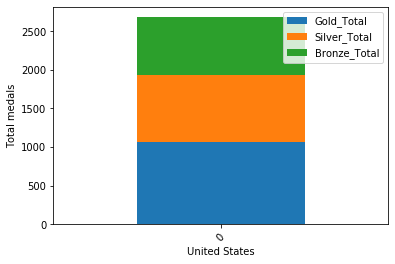

In [199]:
best.plot.bar(stacked=True)
plt.xlabel('United States')
plt.ylabel('Total medals')
plt.xticks(rotation=45)

In [201]:
# #Importing header files
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# #Path of the file is stored in the variable path. 


# #Code starts here

# # Data Loading

# #Reading the file
# data=pd.read_csv('file.csv')

# #Renaming a column
# data.rename(columns={'Total':'Total_Medals'},inplace=True)

# #Printing the first five columns
# print(data.head(5))

# # Summer or Winter

# #Creating new column 'Better_Event'
# data['Better_Event'] = np.where(data['Total_Summer'] > data['Total_Winter'] , 'Summer', 'Winter')
# data['Better_Event'] = np.where(data['Total_Summer'] == data['Total_Winter'] , 'Both', data['Better_Event'])

# #Finding the value with max count in 'Better_Event' column
# better_event=data['Better_Event'].value_counts().index.values[0]

# #Printing the better event
# print('Better_Event=', better_event)

# # Top 10

# #Subsetting the dataframe
# top_countries=data[['Country_Name','Total_Summer', 'Total_Winter','Total_Medals']]

# #Dropping the last row
# top_countries=top_countries[:-1]

# #Function for top 10
# def top_ten(data, col):
    
#     #Creating a new list
#     country_list=[]
    
#     #Finding the top 10 values of 'col' column
#     country_list= list((data.nlargest(10,col)['Country_Name']))
    
#     #Returning the top 10 list
#     return country_list



# #Calling the function for Top 10 in Summer
# top_10_summer=top_ten(top_countries,'Total_Summer')
# print("Top 10 Summer:\n",top_10_summer, "\n")

# #Calling the function for Top 10 in Winter
# top_10_winter=top_ten(top_countries,'Total_Winter')
# print("Top 10 Winter:\n",top_10_winter, "\n")

# #Calling the function for Top 10 in both the events
# top_10=top_ten(top_countries,'Total_Medals')
# print("Top 10:\n",top_10, "\n")

# #Extracting common country names from all three lists
# common=list(set(top_10_summer) & set(top_10_winter) & set(top_10))

# print('Common Countries :\n', common, "\n")

# # Plotting Top 10
# #For Summer

# #Creating the dataframe for Summer event
# summer_df= data[data['Country_Name'].isin(top_10_summer)]

# #Plotting the bar graph
# plt.figure(figsize=(20, 6))
# plt.bar(summer_df['Country_Name'], summer_df['Total_Summer'])

# #Changing the graph title
# plt.title('Top 10 Summer')

# #Changing the x-axis label
# plt.xlabel('Country Name')

# #Changing the y-axis label
# plt.ylabel('Total Medals')


# #For Winter

# #Creating the dataframe for Winter event
# winter_df=data[data['Country_Name'].isin(top_10_winter)]

# #Plotting the bar graph
# plt.figure(figsize=(20, 6))
# plt.bar(winter_df['Country_Name'], winter_df['Total_Winter'])

# #Changing the graph title
# plt.title('Top 10 Winter')

# #Changing the x-axis label
# plt.xlabel('Country Name')

# #Changing the y-axis label
# plt.ylabel('Total Medals')



# #For both the events

# #Creating the dataframe for both the events
# top_df=data[data['Country_Name'].isin(top_10)]

# #Plotting the bar graph
# plt.figure(figsize=(20, 6))
# plt.bar(top_df['Country_Name'], top_df['Total_Medals'])

# #Changing the graph title
# plt.title('Top 10')

# #Changing the x-axis label
# plt.xlabel('Country Name')

# #Changing the y-axis label
# plt.ylabel('Total Medals')

# # Top Performing countries

# #For Summer List

# #Creating new column 'Golden_Ratio'
# summer_df['Golden_Ratio']=summer_df['Gold_Summer']/summer_df['Total_Summer']


# #Finding the max value of 'Golden_Ratio' column
# summer_max_ratio=max(summer_df['Golden_Ratio'])

# #Finding the country assosciated with the max value of 'Golden_Ratio' column
# summer_country_gold=summer_df.loc[summer_df['Golden_Ratio'].idxmax(),'Country_Name']

# print("Top Summer Country:", summer_country_gold, " with a ratio of %.2f" %summer_max_ratio )


# #For Winter List

# #Creating new column 'Golden_Ratio'
# winter_df['Golden_Ratio']=winter_df['Gold_Winter']/winter_df['Total_Winter']


# #Finding the max value of 'Golden_Ratio' column
# winter_max_ratio=max(winter_df['Golden_Ratio'])

# #Finding the country assosciated with the max value of 'Golden_Ratio' column
# winter_country_gold=winter_df.loc[winter_df['Golden_Ratio'].idxmax(),'Country_Name']

# print("Top Winter Country:", winter_country_gold, " with a ratio of %.2f" %winter_max_ratio )


# #For Overall List

# #Creating new column 'Golden_Ratio'
# top_df['Golden_Ratio']=top_df['Gold_Total']/top_df['Total_Medals']

# #Finding the max value of 'Golden_Ratio' column
# top_max_ratio=max(top_df['Golden_Ratio'])

# #Finding the country assosciated with the max value of 'Golden_Ratio' column
# top_country_gold=top_df.loc[top_df['Golden_Ratio'].idxmax(),'Country_Name']

# print("Top Country:", top_country_gold, " with a ratio of %.2f" %top_max_ratio )

# # Best in the world

# #Removing the last column of the dataframe
# data_1=data[:-1]

# #Creating a new column 'Total_Points'
# data_1['Total_Points']= data_1['Gold_Total']*3 + data_1['Silver_Total']*2 + data_1['Bronze_Total']*1  # Use of position index to handle the ambiguity of having same name columns


# #Finding the maximum value of 'Total_Points' column
# most_points=max(data_1['Total_Points'])

# #Finding the country assosciated with the max value of 'Total_Column' column
# best_country=data_1.loc[data_1['Total_Points'].idxmax(),'Country_Name']
# print('The maximum points achieved is ', most_points, ' by ', best_country )

# # Plot for the best

# #Subsetting the dataframe
# best=data[data['Country_Name']==best_country]
# best.reset_index(drop = True, inplace = True)
# best=best[['Gold_Total','Silver_Total','Bronze_Total']]


# #Plotting bar plot
# best.plot.bar(stacked=True)

# #Changing the x-axis label
# plt.xlabel('United States')

# #Changing the y-axis label
# plt.ylabel('Medals Tally')

# #Rotating the ticks of X-axis
# plt.xticks(rotation=45)

# #Updating the graph legend
# l=plt.legend()
# l.get_texts()[0].set_text('Gold_Total :' + str(best['Gold_Total'].values))
# l.get_texts()[1].set_text('Silver_Total :' + str(best['Silver_Total'].values))
# l.get_texts()[2].set_text('Bronze_Total :' + str(best['Bronze_Total'].values))
